In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import h5py

from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

from sociohydro import *

lw = 1
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['axes.linewidth'] = lw
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = lw
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = lw
plt.rcParams['font.size'] = 6
plt.rcParams['legend.framealpha'] = 0.
plt.rcParams['legend.handlelength'] = 1.25
plt.rcParams['image.origin'] = 'upper'
plt.rcParams['pcolor.shading'] = 'auto'
plt.rcParams['figure.dpi'] = 150

(100, 87) (100, 87) (100, 87)
(5, 100, 87) (5, 100, 87)
(8700, 2) (8700,) ()


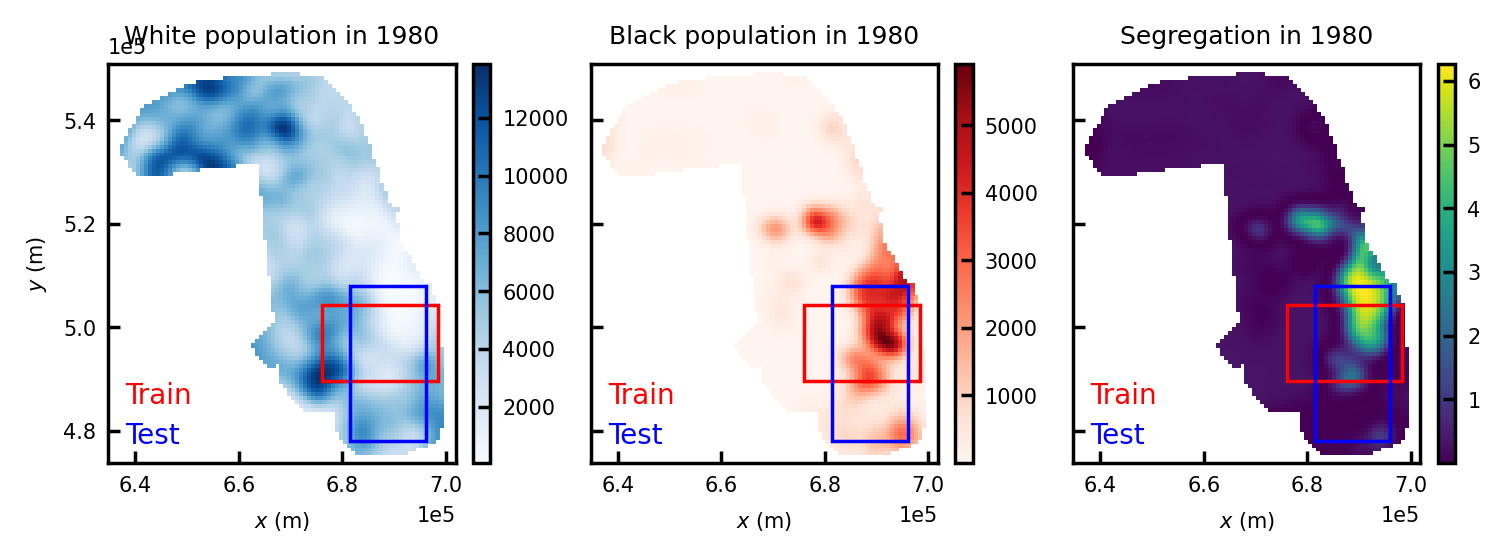

In [2]:
from matplotlib.patches import Rectangle

'''
Load and plot data from HDF5 files 
'''
with h5py.File("data/cook_IL.hdf5", "r") as d:
    x_grid = d["x_grid"][:]
    y_grid = d["y_grid"][:]
    w_grid_array_masked = d["w_grid_array_masked"][:].transpose(2, 0, 1)
    b_grid_array_masked = d["b_grid_array_masked"][:].transpose(2, 0, 1)
    
    for i in range(5):
        w_grid_array_masked[i] = smooth_with_fill(w_grid_array_masked[i])
        b_grid_array_masked[i] = smooth_with_fill(b_grid_array_masked[i])
        
    mask = d['mask'][:]
    
T = np.array([1980, 1990, 2000, 2010, 2020])
ii = 0
    
pop = np.array([w_grid_array_masked[ii].ravel(),
                b_grid_array_masked[ii].ravel()]).T
h, H = entropy_index(pop)
    
print(x_grid.shape, y_grid.shape, mask.shape)
print(w_grid_array_masked.shape, b_grid_array_masked.shape)
print(pop.shape, h.shape, H.shape)

plt.rcParams['pcolor.shading'] = 'auto'
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1, 3, sharey=True)

c0 = ax[0].pcolormesh(x_grid, y_grid, w_grid_array_masked[ii], cmap="Blues")
cax0 = ax[0].inset_axes([1.05, 0, 0.05, 1])
fig.colorbar(c0, ax=ax[0], cax=cax0)

c1 = ax[1].pcolormesh(x_grid, y_grid, b_grid_array_masked[ii], cmap="Reds")
cax1 = ax[1].inset_axes([1.05, 0, 0.05, 1])
fig.colorbar(c1, ax=ax[1], cax=cax1)

c2 = ax[2].pcolormesh(x_grid, y_grid, h.reshape(x_grid.shape), cmap="viridis")
cax2 = ax[2].inset_axes([1.05, 0, 0.05, 1])
fig.colorbar(c2, ax=ax[2], cax=cax2)

train_bbox = np.s_[20:40, 53:83]
test_bbox = np.s_[13:43, 51:81]
test_bbox = np.s_[5:45, 60:80]

for bbox, color in zip([train_bbox, test_bbox], ['red', 'blue']):
    x0, x1 = x_grid[bbox].min(), x_grid[bbox].max()
    y0, y1 = y_grid[bbox].min(), y_grid[bbox].max()
    
    for a in ax:
        rect = Rectangle((x0, y0), x1-x0, y1-y0, edgecolor=color, facecolor='none')
        a.add_patch(rect)

for a in ax.ravel():
    a.set_aspect(1)
    a.ticklabel_format(axis='both', scilimits=(0,0))
    a.set_xlabel('$x$ (m)')
    a.text(0.05, 0.15, 'Train', color='red', transform=a.transAxes, fontsize=8)
    a.text(0.05, 0.05, 'Test', color='blue', transform=a.transAxes, fontsize=8)
ax[0].set_ylabel('$y$ (m)')
ax[0].set_yticks([4.8e5, 5.0e5, 5.2e5, 5.4e5])

ax[0].set_title(f'White population in {T[ii]}')
ax[1].set_title(f'Black population in {T[ii]}')
ax[2].set_title(f'Segregation in {T[ii]}')

plt.tight_layout()

(100, 87) (100, 87) (100, 87)
(5, 100, 87) (5, 100, 87)
(8700, 2) (8700,) ()


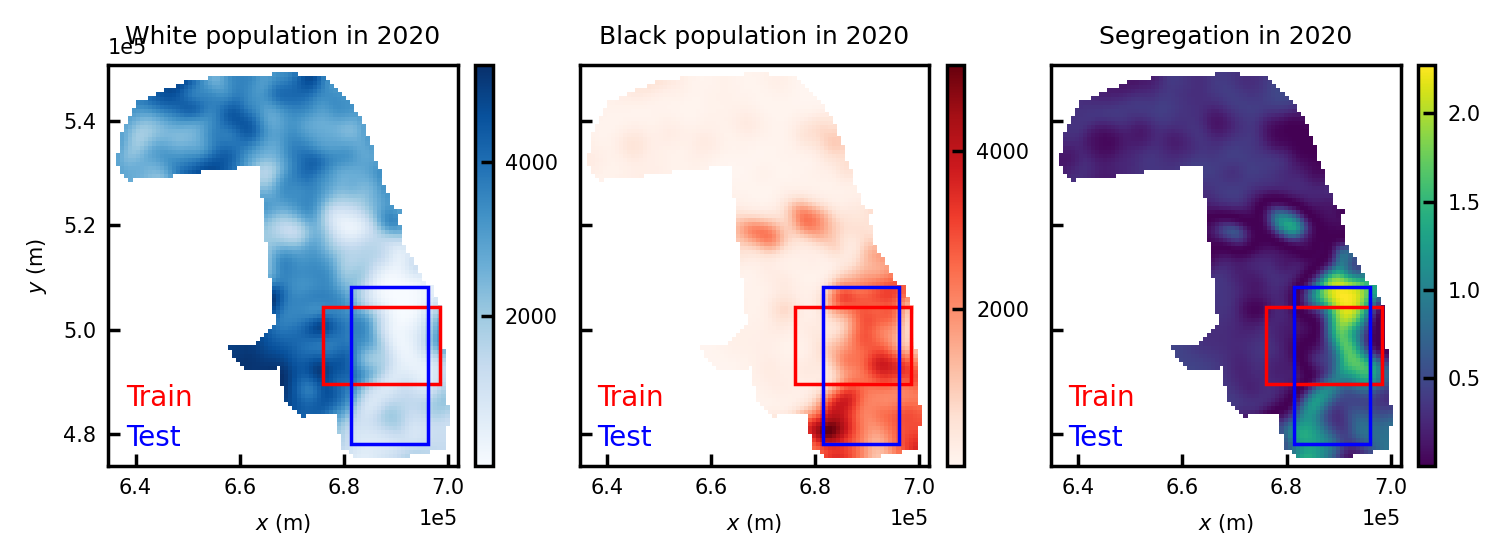

In [3]:
from matplotlib.patches import Rectangle

ii = 4
    
pop = np.array([w_grid_array_masked[ii].ravel(),
                b_grid_array_masked[ii].ravel()]).T
h, H = entropy_index(pop)
    
print(x_grid.shape, y_grid.shape, mask.shape)
print(w_grid_array_masked.shape, b_grid_array_masked.shape)
print(pop.shape, h.shape, H.shape)

plt.rcParams['pcolor.shading'] = 'auto'
plt.rcParams['figure.dpi'] = 250
fig, ax = plt.subplots(1, 3, sharey=True)

c0 = ax[0].pcolormesh(x_grid, y_grid, w_grid_array_masked[ii], cmap="Blues")
cax0 = ax[0].inset_axes([1.05, 0, 0.05, 1])
fig.colorbar(c0, ax=ax[0], cax=cax0, ticks=[0, 2000, 4000, 6000])

c1 = ax[1].pcolormesh(x_grid, y_grid, b_grid_array_masked[ii], cmap="Reds")
cax1 = ax[1].inset_axes([1.05, 0, 0.05, 1])
fig.colorbar(c1, ax=ax[1], cax=cax1, ticks=[0, 2000, 4000, 6000])

c2 = ax[2].pcolormesh(x_grid, y_grid, h.reshape(x_grid.shape), cmap="viridis")
cax2 = ax[2].inset_axes([1.05, 0, 0.05, 1])
fig.colorbar(c2, ax=ax[2], cax=cax2)

train_bbox = np.s_[20:40, 53:83]
test_bbox = np.s_[13:43, 51:81]
test_bbox = np.s_[5:45, 60:80]

for bbox, color in zip([train_bbox, test_bbox], ['red', 'blue']):
    x0, x1 = x_grid[bbox].min(), x_grid[bbox].max()
    y0, y1 = y_grid[bbox].min(), y_grid[bbox].max()
    
    for a in ax:
        rect = Rectangle((x0, y0), x1-x0, y1-y0, edgecolor=color, facecolor='none')
        a.add_patch(rect)
        


for a in ax.ravel():
    a.set_aspect(1)
    a.ticklabel_format(axis='both', scilimits=(0,0))
    a.set_xlabel('$x$ (m)')
    a.text(0.05, 0.15, 'Train', color='red', transform=a.transAxes, fontsize=8)
    a.text(0.05, 0.05, 'Test', color='blue', transform=a.transAxes, fontsize=8)
ax[0].set_ylabel('$y$ (m)')
ax[0].set_yticks([4.8e5, 5.0e5, 5.2e5, 5.4e5])

ax[0].set_title(f'White population in {T[ii]}')
ax[1].set_title(f'Black population in {T[ii]}')
ax[2].set_title(f'Segregation in {T[ii]}')

plt.tight_layout()

White 1980: y0: [99, 13854], y1: [99, 13854]
White 2000: y0: [38, 7021], y1: [0, 12492]
White 2020: y0: [63, 4999], y1: [0, 11133]
Black 1980: y0: [7, 5905], y1: [7, 5905]
Black 2000: y0: [28, 5512], y1: [123, 6021]
Black 2020: y0: [115, 3801], y1: [239, 6138]
Segregation 1980: y0: [0, 2], y1: [0, 2]
Segregation 2000: y0: [0, 1], y1: [0, 2]
Segregation 2020: y0: [0, 1], y1: [-0, 1]
Conv_ODEFunc 761.390380859375


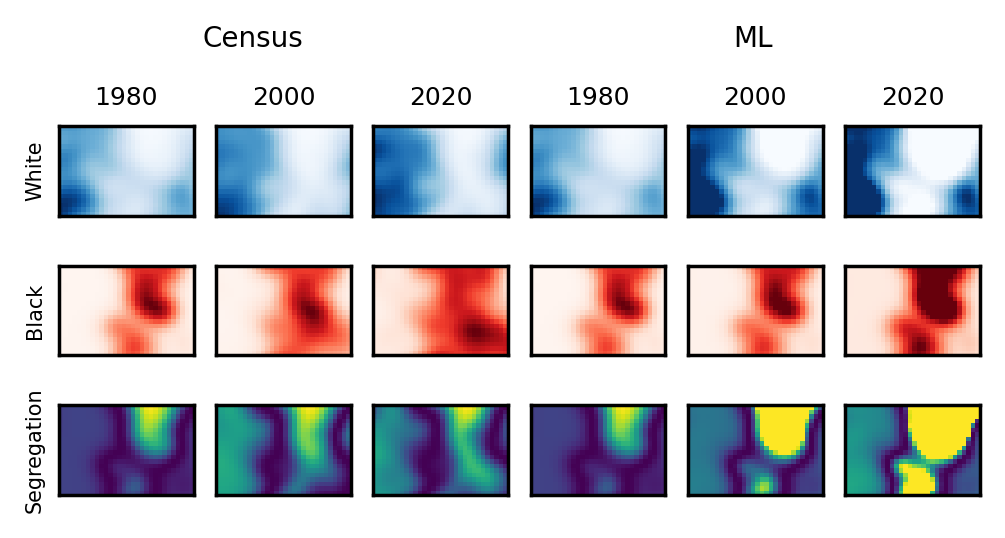

In [7]:
from run_socio_NODE import *

plt.rcParams['image.origin'] = 'lower'

dataset = SociohydrodynamicsDataset(test_bbox=[20, 53, 20, 30])
#dataset = SociohydrodynamicsDataset(test_bbox=[5, 60, 40, 20])

device = torch.device('cuda:0')
name = 'Conv_ODEFunc'
info = torch.load(f'data/{name}.ckpt', map_location='cpu')

model = eval(name)(**info['hparams'])
model.load_state_dict(info['state_dict'])
model.to(device)

ode_kwargs = dict(atol=1e-5, rtol=1e-5)
batch = dataset.test_batch
with torch.no_grad():
    t = batch['t'].to(device)
    wb = torch.stack([batch['w'], batch['b']], dim=-3).to(device)
    wb_pred = odeint(model, wb[0:1], t, **ode_kwargs).squeeze()
    wb_pred[wb_pred < 0] = 0
    loss = F.l1_loss(wb, wb_pred)
    
    wb = wb.cpu().numpy()
    wb_pred = wb_pred.cpu().numpy()    
    
fig, ax = plt.subplots(3, 6, figsize=(4, 2))


cmaps = ['Blues', 'Reds', 'viridis']
for j, label in enumerate(['White', 'Black', 'Segregation']):
    cmap = cmaps[j]

    for i, tt in enumerate([0, 2, 4]):
        if label == 'Segregation':
            y0 = seg(wb[tt, 0], wb[tt, 1])
            y1 = seg(wb_pred[tt, 0], wb_pred[tt, 1])
            vmax = 2
        else:
            y0 = wb[tt, j]
            y1 = wb_pred[tt, j]
            vmax = np.max(wb[:, j])
        print(f'{label} {dataset.t[tt]}: y0: [{y0.min():.0f}, {y0.max():.0f}], y1: [{y1.min():.0f}, {y1.max():.0f}]')
            
        vmax = np.max(y0)
        ax[j, i].imshow(y0, cmap=cmap, vmin=0, vmax=vmax)
        ax[0, i].set_title(dataset.t[tt])
        
        ax[j, 3+i].imshow(y1, cmap=cmap, vmin=0, vmax=vmax)
        ax[0, 3+i].set_title(dataset.t[tt])

print(name, loss.item())
    
for a in ax.flatten():
    a.set(xticks=[], yticks=[])

ax[0, 0].set_ylabel('White')
ax[1, 0].set_ylabel('Black')
ax[2, 0].set_ylabel('Segregation')

fig.text(0.25, 1.05, 'Census', ha='center', va='top', fontsize=8)
fig.text(0.75, 1.05, 'ML', ha='center', va='top', fontsize=8)

plt.tight_layout()

White 1980: y0: [49, 8989], y1: [49, 8989]
White 2000: y0: [23, 5007], y1: [0, 7632]
White 2020: y0: [44, 4069], y1: [0, 6269]
Black 1980: y0: [11, 5905], y1: [11, 5905]
Black 2000: y0: [121, 5512], y1: [128, 6022]
Black 2020: y0: [359, 5095], y1: [245, 6139]
Segregation 1980: y0: [0, 2], y1: [0, 2]
Segregation 2000: y0: [0, 1], y1: [0, 1]
Segregation 2020: y0: [0, 1], y1: [0, 1]
Conv_ODEFunc 872.47900390625


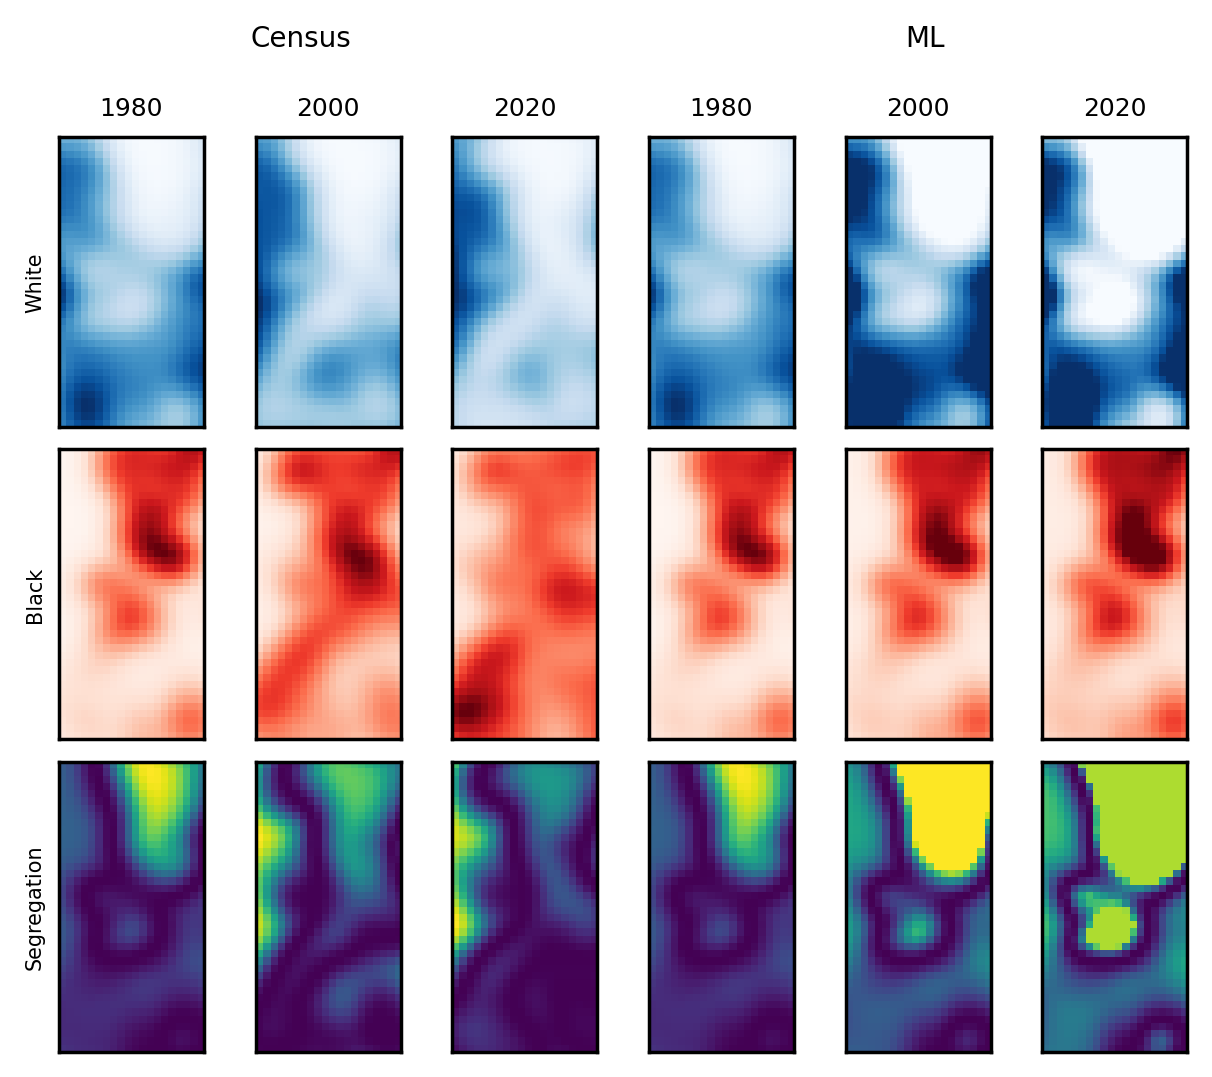

In [8]:
from run_socio_NODE import *

plt.rcParams['image.origin'] = 'lower'

dataset = SociohydrodynamicsDataset(test_bbox=[5, 60, 40, 20])

batch = dataset.test_batch
with torch.no_grad():
    t = batch['t'].to(device)
    wb = torch.stack([batch['w'], batch['b']], dim=-3).to(device)
    wb_pred = odeint(model, wb[0:1], t, **ode_kwargs).squeeze()
    wb_pred[wb_pred < 0] = 0
    loss = F.l1_loss(wb, wb_pred)
    
    wb = wb.cpu().numpy()
    wb_pred = wb_pred.cpu().numpy()    
    
fig, ax = plt.subplots(3, 6, figsize=(5, 4))


cmaps = ['Blues', 'Reds', 'viridis']
for j, label in enumerate(['White', 'Black', 'Segregation']):
    cmap = cmaps[j]

    for i, tt in enumerate([0, 2, 4]):
        if label == 'Segregation':
            y0 = seg(wb[tt, 0], wb[tt, 1])
            y1 = seg(wb_pred[tt, 0], wb_pred[tt, 1])
            vmax = 2
        else:
            y0 = wb[tt, j]
            y1 = wb_pred[tt, j]
            vmax = np.max(wb[:, j])
        print(f'{label} {dataset.t[tt]}: y0: [{y0.min():.0f}, {y0.max():.0f}], y1: [{y1.min():.0f}, {y1.max():.0f}]')
            
        vmax = np.max(y0)
        ax[j, i].imshow(y0, cmap=cmap, vmin=0, vmax=vmax)
        ax[0, i].set_title(dataset.t[tt])
        
        ax[j, 3+i].imshow(y1, cmap=cmap, vmin=0, vmax=vmax)
        ax[0, 3+i].set_title(dataset.t[tt])

print(name, loss.item())
    
for a in ax.flatten():
    a.set(xticks=[], yticks=[])

ax[0, 0].set_ylabel('White')
ax[1, 0].set_ylabel('Black')
ax[2, 0].set_ylabel('Segregation')

fig.text(0.25, 1.05, 'Census', ha='center', va='top', fontsize=8)
fig.text(0.75, 1.05, 'ML', ha='center', va='top', fontsize=8)

plt.tight_layout()

White 1980: y0: [4, 16968], y1: [4, 16968]
White 1990: y0: [4, 8852], y1: [0, 16780]
White 2000: y0: [4, 7191], y1: [0, 16594]
White 2010: y0: [5, 6943], y1: [0, 16420]
White 2020: y0: [4, 6956], y1: [0, 16232]
Black 1980: y0: [0, 16447], y1: [0, 16447]
Black 1990: y0: [0, 15281], y1: [78, 16530]
Black 2000: y0: [5, 14176], y1: [160, 16613]
Black 2010: y0: [36, 5280], y1: [242, 16694]
Black 2020: y0: [5, 5593], y1: [325, 16777]


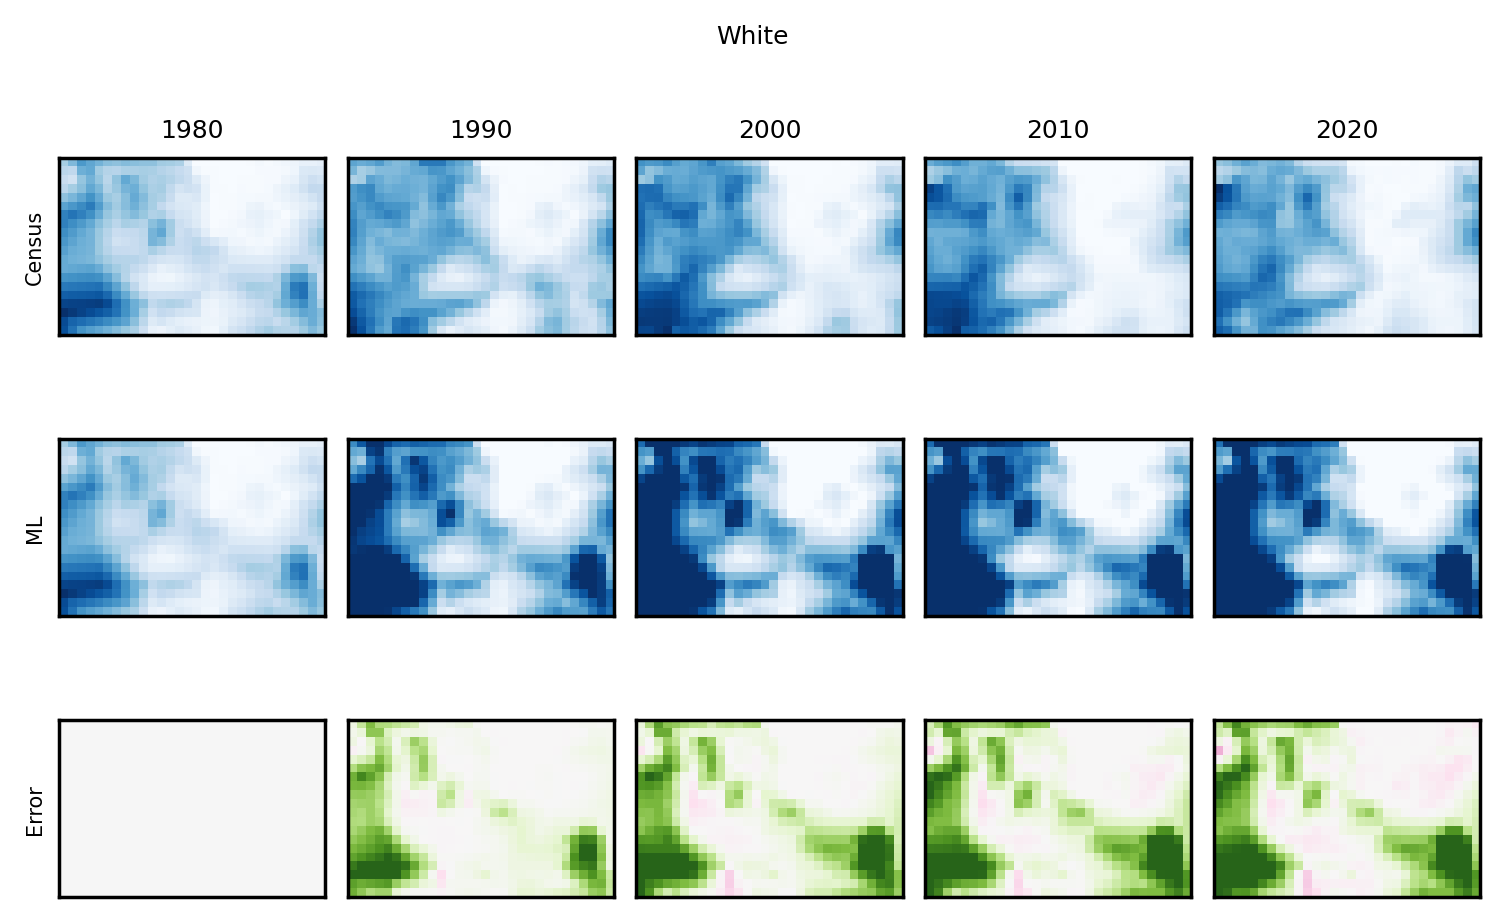

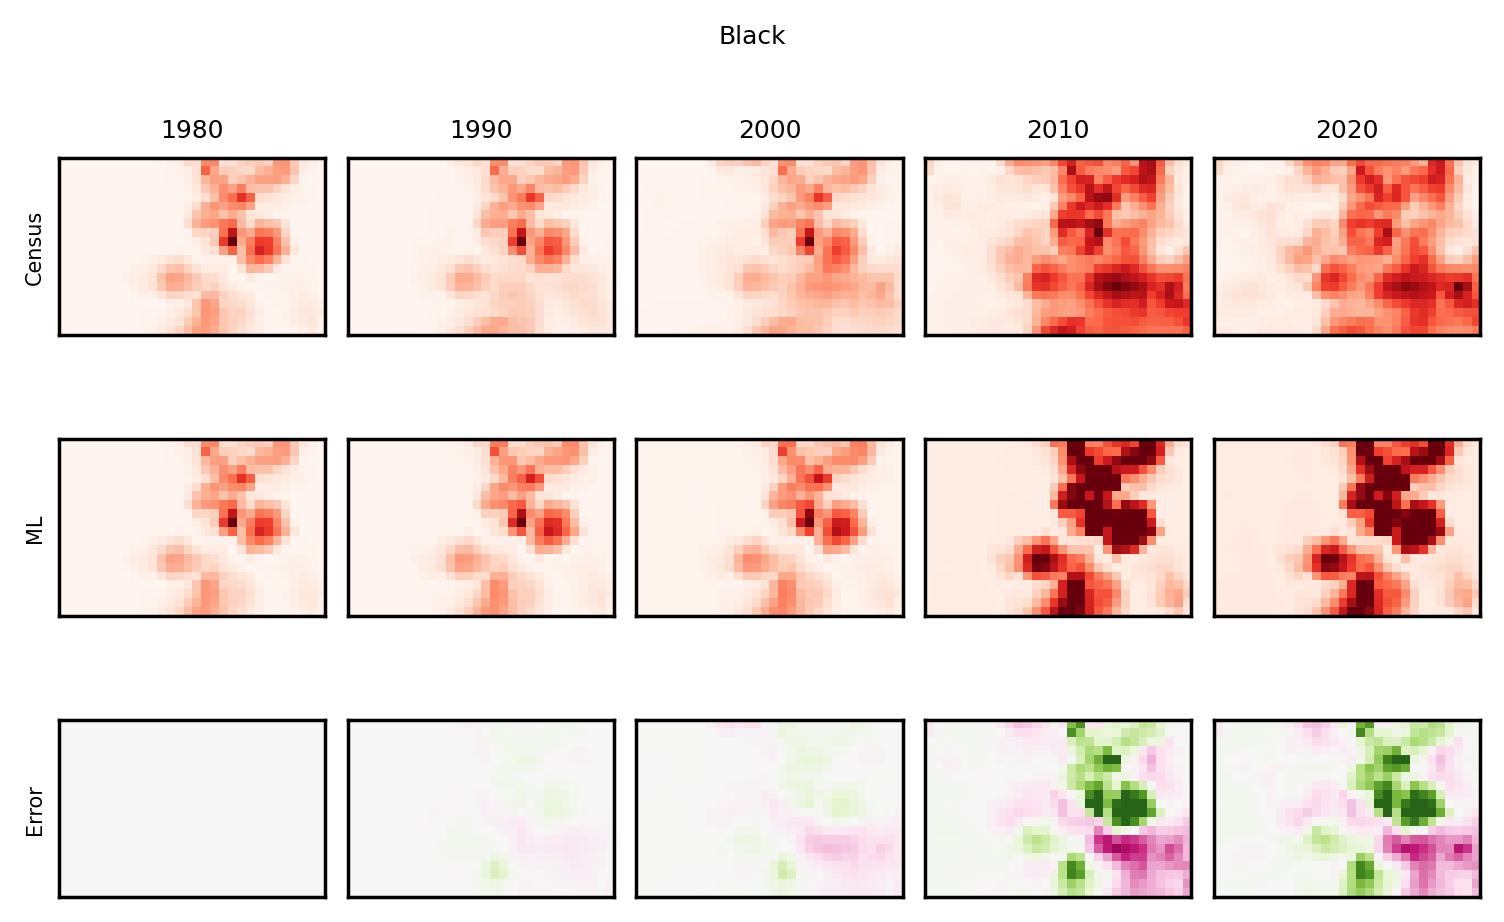

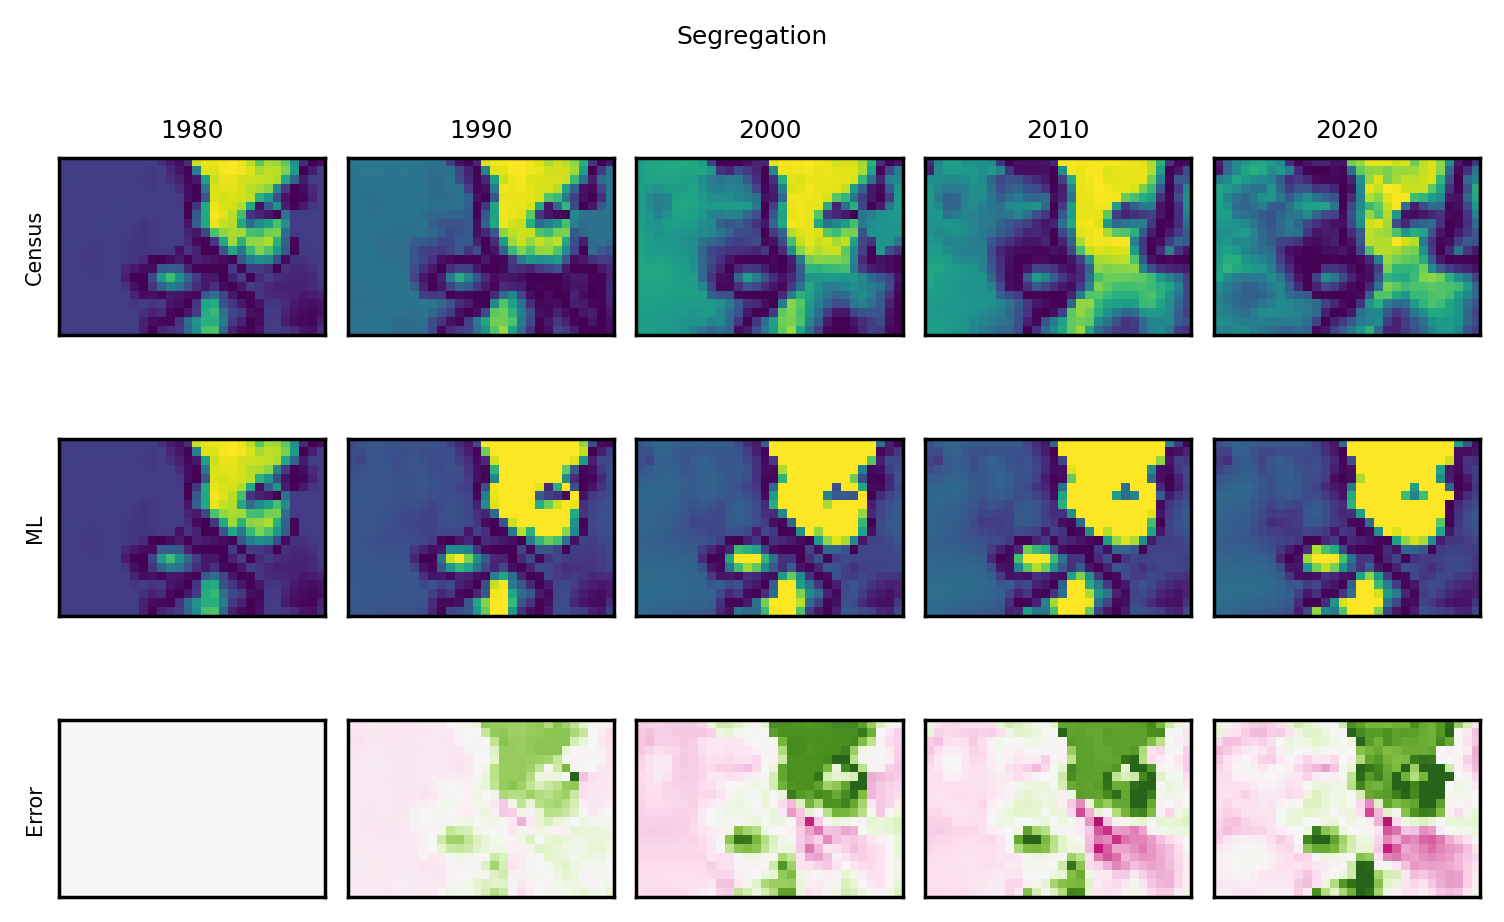

In [315]:
from run_socio_NODE import *

dataset = SociohydrodynamicsDataset(test_bbox=[20, 53, 20, 30])
#dataset = SociohydrodynamicsDataset(test_bbox=[5, 60, 40, 20])


name = 'Conv_ODEFunc'
info = torch.load(f'data/{name}.ckpt', map_location='cpu')

model = eval(name)(**info['hparams'])
model.load_state_dict(info['state_dict'])
model.to(device)

batch = dataset.test_batch
with torch.no_grad():
    t = batch['t'].to(device)
    wb = torch.stack([batch['w'], batch['b']], dim=-3).to(device)
    wb_pred = odeint(model, wb[0:1], t, **ode_kwargs).squeeze()
    wb_pred[wb_pred < 0] = 0
    loss = F.l1_loss(wb, wb_pred)
    
    wb = wb.cpu().numpy()
    wb_pred = wb_pred.cpu().numpy()    

cmaps = ['Blues', 'Reds', 'viridis']
for j, title in enumerate(['White', 'Black', 'Segregation']):
    fig, ax = plt.subplots(3, 5)
    cmap = cmaps[j]

    for i in range(5):
        if title == 'Segregation':
            y0 = seg(wb[i, 0], wb[i, 1])
            y1 = seg(wb_pred[i, 0], wb_pred[i, 1])
        else:
            y0 = wb[i, j]
            y1 = wb_pred[i, j]
            print(f'{title} {dataset.t[i]}: y0: [{y0.min():.0f}, {y0.max():.0f}], y1: [{y1.min():.0f}, {y1.max():.0f}]')
        vmax = np.max(y0)
        ax[0, i].imshow(y0, cmap=cmap, vmin=0, vmax=vmax)
        ax[1, i].imshow(y1, cmap=cmap, vmin=0, vmax=vmax)
        ax[2, i].imshow(y1-y0, vmax=vmax, vmin=-vmax, cmap='PiYG')
        ax[0, i].set_title(dataset.t[i])
    
    for a in ax.flatten():
        a.set(xticks=[], yticks=[])

    ax[0, 0].set_ylabel('Census')
    ax[1, 0].set_ylabel('ML')
    ax[2, 0].set_ylabel('Error')
    fig.suptitle(title)
    plt.tight_layout()

# Dataset

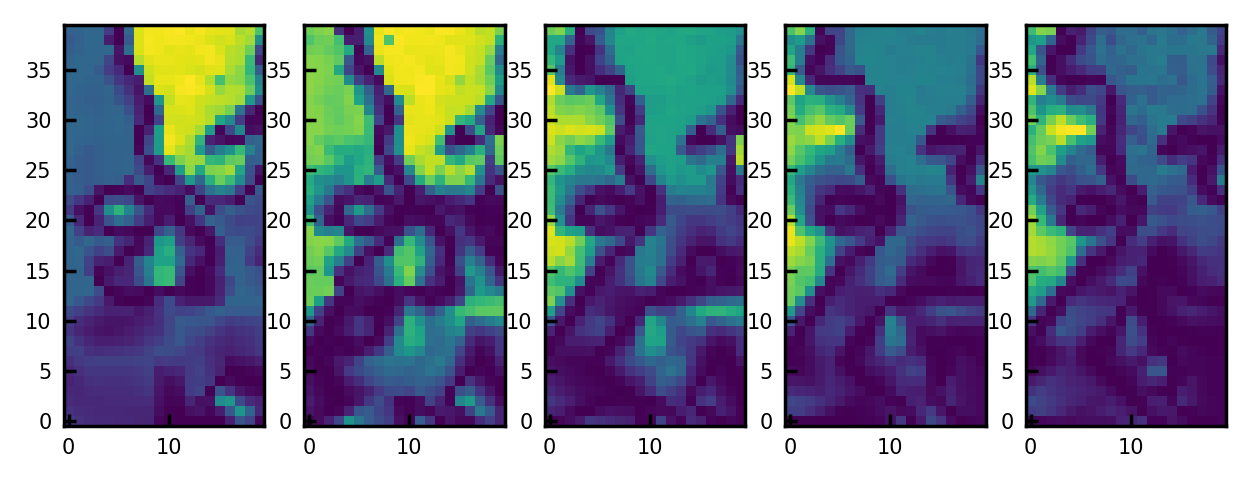

In [256]:
from torch.utils.data import IterableDataset
from scipy.interpolate import interp1d

class SociohydrodynamicsDataset(IterableDataset):
    def __init__(self, 
                 filename='data/cook_IL.hdf5', 
                 window_size=(32,24),
                 batch_size=16,
                 test_bbox=[20, 43, 60, 23]):
        self.filename = filename
        self.window_size = window_size
        self.batch_size = batch_size
        
        with h5py.File(filename, 'r') as d:
            x_grid = d["x_grid"][:]
            y_grid = d["y_grid"][:]
            w_grid = d["w_grid_array_masked"][:]
            b_grid = d["b_grid_array_masked"][:]

        self.x = x_grid[0]
        self.y = y_grid[:, 0]
        self.t = np.array([1980, 1990, 2000, 2010, 2020])
        
        self.w_func = interp1d(self.t, w_grid, axis=2)
        self.b_func = interp1d(self.t, b_grid, axis=2)
        
        y0, x0, h, w = test_bbox
        w_test = w_grid[y0:y0+h, x0:x0+w].transpose(2, 0, 1)
        b_test = b_grid[y0:y0+h, x0:x0+w].transpose(2, 0, 1)
        self.test_batch = {
            't': torch.from_numpy(self.t).float(),
            'w': torch.from_numpy(w_test).float(),
            'b': torch.from_numpy(b_test).float(),
        }
        
        
    def __next__(self):
        '''
        Yield a sample interpolated from the data
        '''
        t0 = np.random.random()
        t1 =  t0 + (1 - t0) * np.random.random()
        
        t = np.array([t0, t1])
        t = t * np.ptp(self.t) + self.t[0]

        w = self.w_func(t)
        b = self.b_func(t)
        
        w_windows = sliding_window_view(w, self.window_size, axis=(0, 1))
        b_windows = sliding_window_view(b, self.window_size, axis=(0, 1))
        
        valid = np.logical_and(~np.isnan(w_windows), ~np.isnan(b_windows))
        valid = np.all(valid, axis=(-1, -2, -3))
        w_windows = w_windows[valid]
        b_windows = b_windows[valid]

        idx = np.random.choice(w_windows.shape[0], self.batch_size, replace=False)
        w = w_windows[idx]
        b = b_windows[idx]
                
        return {
            't': torch.from_numpy(t).float(),
            'w': torch.from_numpy(w).float(),
            'b': torch.from_numpy(b).float(),
        }
        
    def __iter__(self):
        return self
    
dataset = SociohydrodynamicsDataset(test_bbox=[20, 43, 26, 36])
dataset = SociohydrodynamicsDataset(test_bbox=[20, 43, 60, 23])


dataset = SociohydrodynamicsDataset(test_bbox=[20, 53, 20, 30])
dataset = SociohydrodynamicsDataset(test_bbox=[13, 51, 30, 30])
dataset = SociohydrodynamicsDataset(test_bbox=[5, 60, 40, 20])



fig, ax = plt.subplots(1, 5)
for i in range(5):
    b, w = dataset.test_batch['b'][i].numpy(), dataset.test_batch['w'][i].numpy()
    s = seg(w, b)
    ax[i].imshow(s, origin='lower')


(5, 60, 23) 0 0
tensor([2016.7191, 2016.7242])
t torch.Size([2]) tensor(0.)
w torch.Size([16, 2, 32, 24]) tensor(0.)
b torch.Size([16, 2, 32, 24]) tensor(0.)


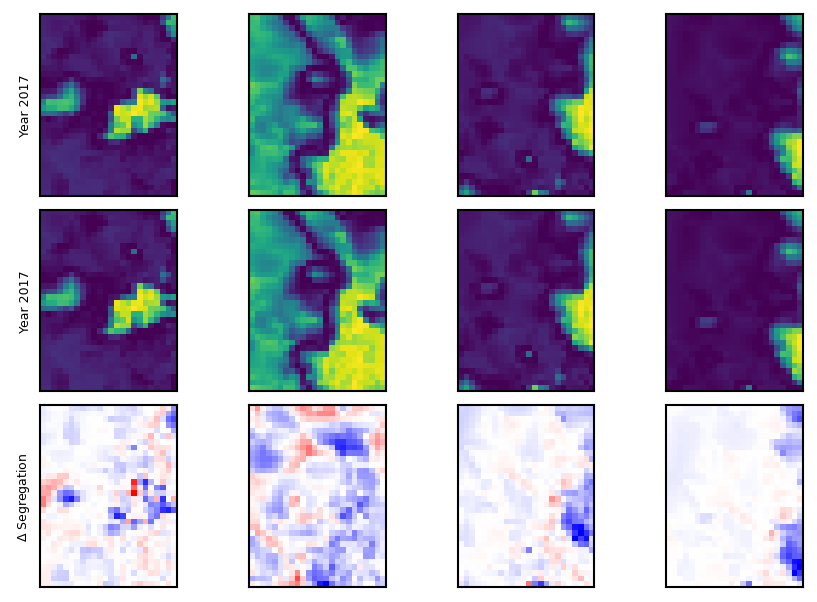

In [134]:
dataset = SociohydrodynamicsDataset()
batch = next(iter(dataset))
print(batch['t'])
for key in batch:
    print(key, batch[key].shape, torch.sum(torch.isnan(batch[key])) / np.prod(batch[key].shape))
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True)
for i in range(4):
    b, w = batch['b'][i].numpy(), batch['w'][i].numpy()
    s0 = seg(w[0], b[0])
    s1 = seg(w[1], b[1])
    ax[0, i].imshow(s0)
    ax[1, i].imshow(s1)
    vmax = np.max(np.abs(s1 - s0))
    ax[2, i].imshow(s1-s0, cmap='bwr', vmin=-vmax, vmax=vmax)
    for j in range(3):
        ax[j,i].set(xticks=[], yticks=[])
ax[0, 0].set_ylabel(f'Year {batch["t"][0].item():.4g}')
ax[1, 0].set_ylabel(f'Year {batch["t"][1].item():.4g}')
ax[2, 0].set_ylabel('$\\Delta$ Segregation')
plt.tight_layout()

White 1980: y0: [4, 12032], y1: [4, 12032]
White 1990: y0: [4, 9086], y1: [0, 11480]
White 2000: y0: [3, 6795], y1: [0, 10933]
White 2010: y0: [4, 5715], y1: [0, 10384]
White 2020: y0: [2, 5487], y1: [0, 9830]
Black 1980: y0: [0, 16447], y1: [0, 16447]
Black 1990: y0: [1, 15281], y1: [51, 16499]
Black 2000: y0: [11, 14176], y1: [102, 16550]
Black 2010: y0: [63, 6914], y1: [153, 16602]
Black 2020: y0: [39, 7482], y1: [204, 16653]


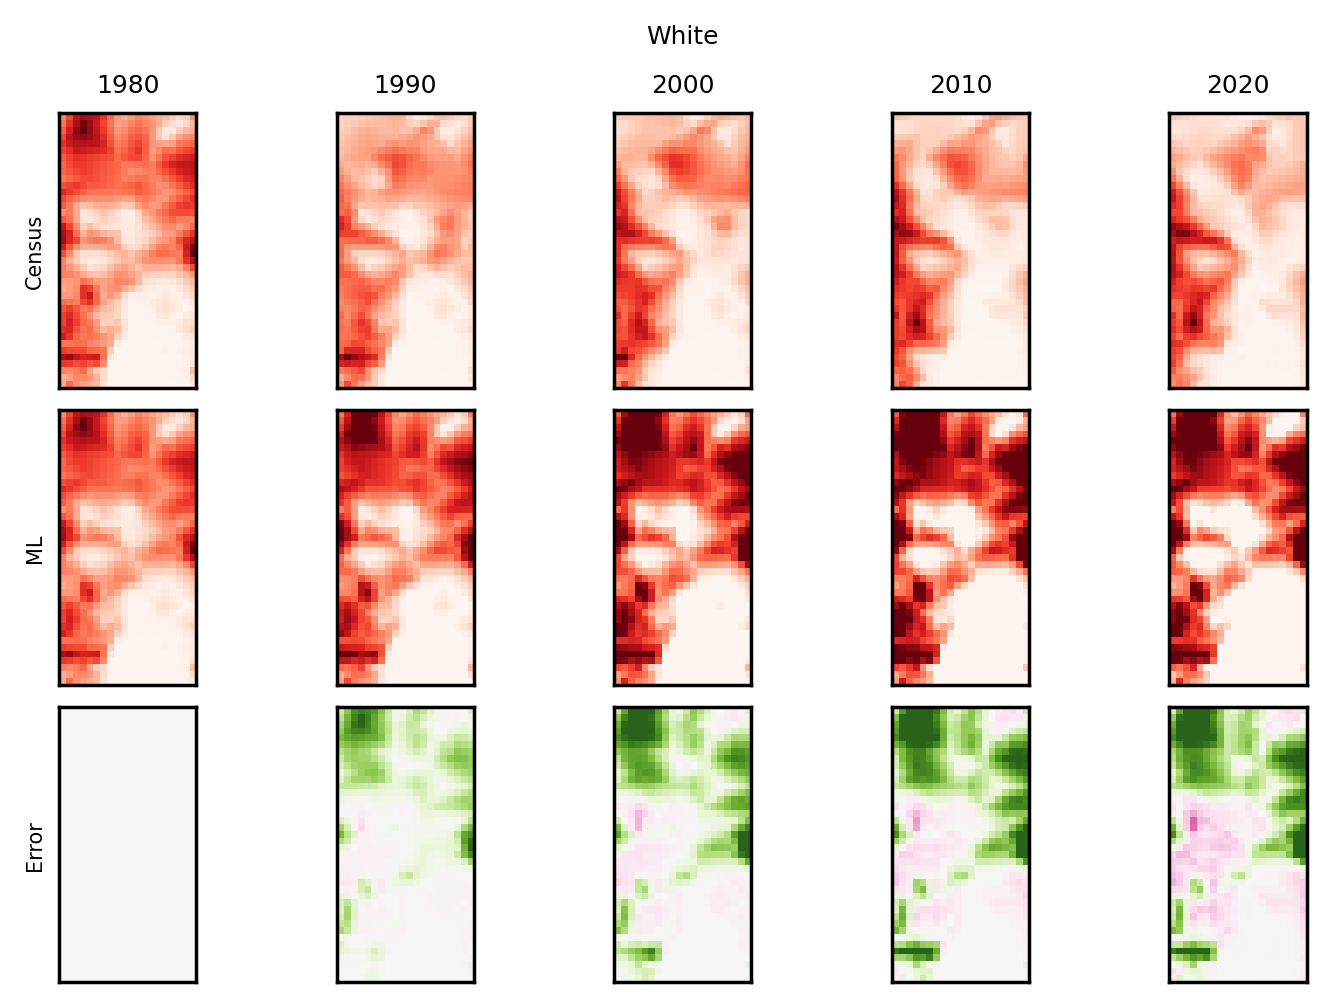

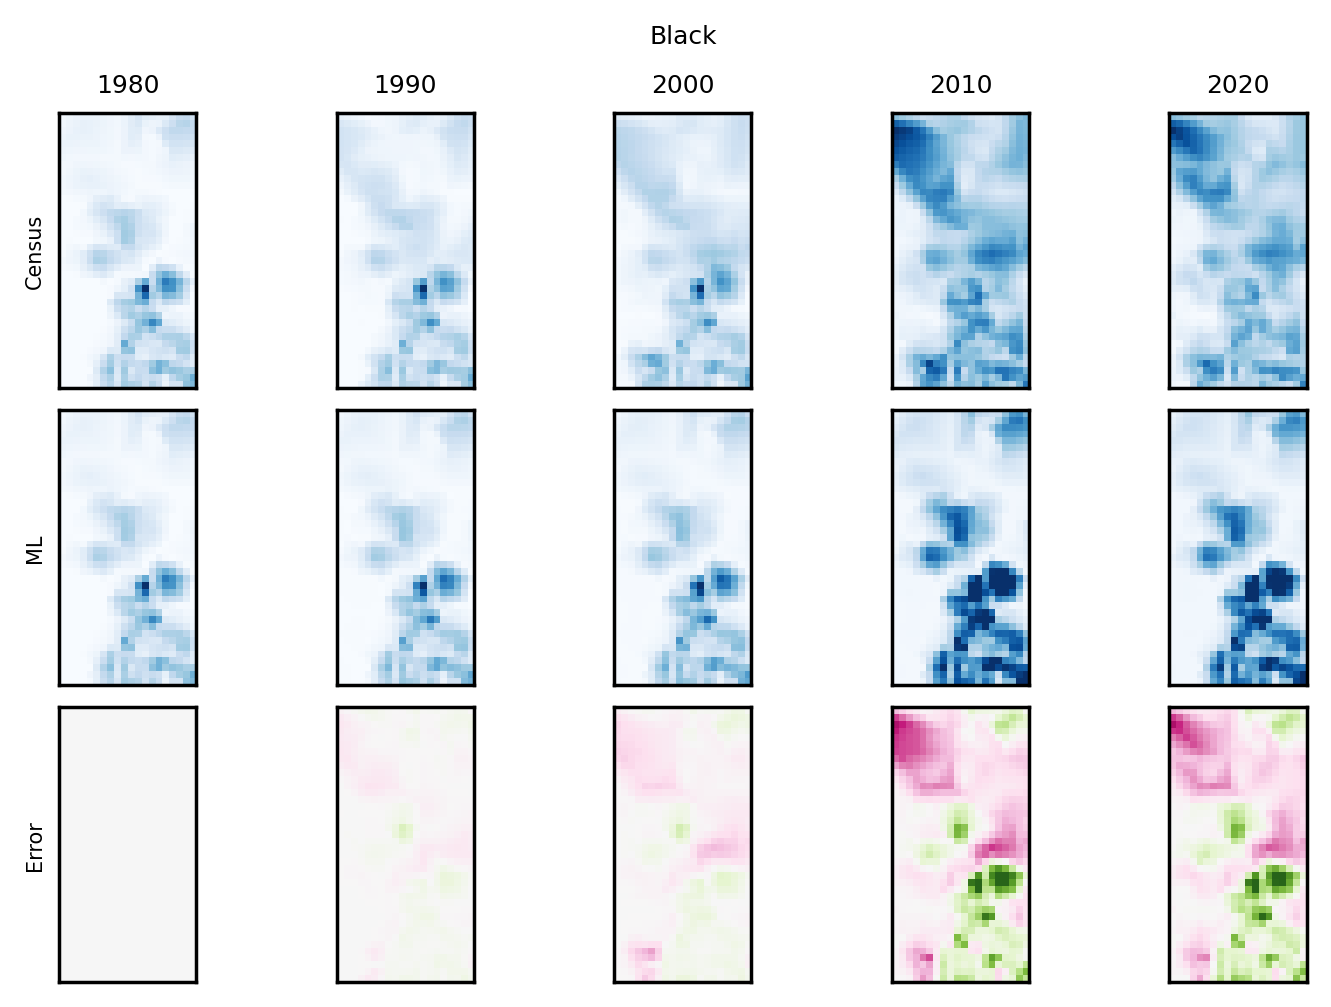

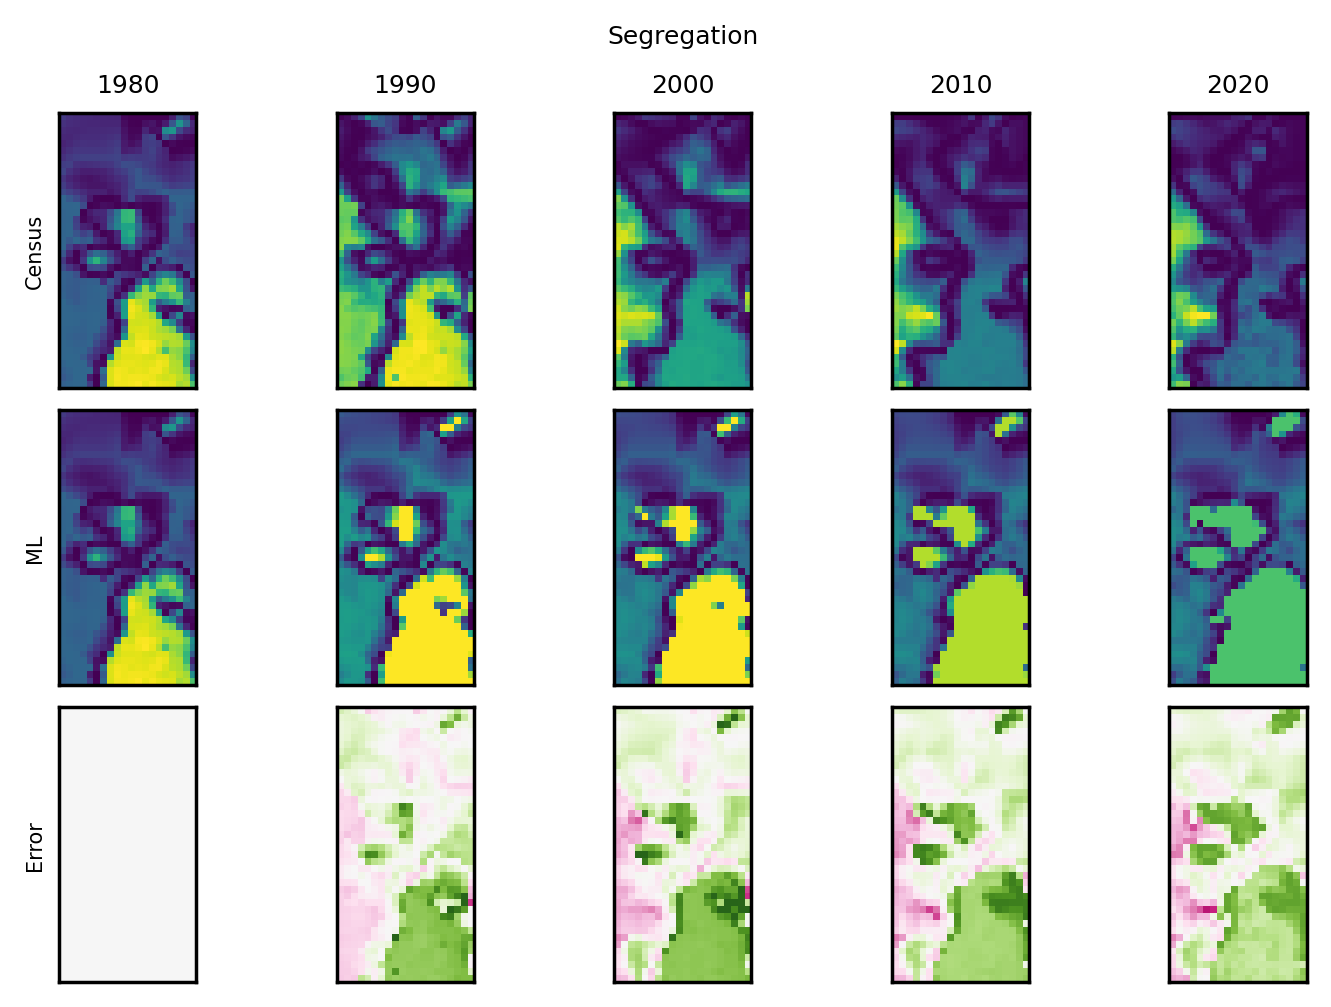

In [257]:
from run_socio_NODE import *

dataset = SociohydrodynamicsDataset(test_bbox=[13, 51, 30, 30])
dataset = SociohydrodynamicsDataset(test_bbox=[20, 53, 20, 30])
dataset = SociohydrodynamicsDataset(test_bbox=[5, 60, 40, 20])


name = 'Conv_ODEFunc'
#name = 'FCN_ODEFunc'
info = torch.load(f'data/{name}.ckpt', map_location='cpu')

model = eval(name)(**info['hparams'])
model.load_state_dict(info['state_dict'])
model.to(device)

batch = dataset.test_batch
with torch.no_grad():
    t = batch['t'].to(device)
    wb = torch.stack([batch['w'], batch['b']], dim=-3).to(device)
    wb_pred = odeint(model, wb[0:1], t, **ode_kwargs).squeeze()
    wb_pred[wb_pred < 0] = 0
    loss = F.l1_loss(wb, wb_pred)
    
    wb = wb.cpu().numpy()
    wb_pred = wb_pred.cpu().numpy()    

cmaps = ['Reds', 'Blues', 'viridis']
for j, title in enumerate(['White', 'Black', 'Segregation']):
    fig, ax = plt.subplots(3, 5)
    cmap = cmaps[j]

    for i in range(5):
        if title == 'Segregation':
            y0 = seg(wb[i, 0], wb[i, 1])
            y1 = seg(wb_pred[i, 0], wb_pred[i, 1])
        else:
            y0 = wb[i, j]
            y1 = wb_pred[i, j]
            print(f'{title} {dataset.t[i]}: y0: [{y0.min():.0f}, {y0.max():.0f}], y1: [{y1.min():.0f}, {y1.max():.0f}]')
        vmax = np.max(y0)
        ax[0, i].imshow(y0, cmap=cmap, vmin=0, vmax=vmax)
        ax[1, i].imshow(y1, cmap=cmap, vmin=0, vmax=vmax)
        ax[2, i].imshow(y1-y0, vmax=vmax, vmin=-vmax, cmap='PiYG')
        ax[0, i].set_title(dataset.t[i])
    
    for a in ax.flatten():
        a.set(xticks=[], yticks=[])

    ax[0, 0].set_ylabel('Census')
    ax[1, 0].set_ylabel('ML')
    ax[2, 0].set_ylabel('Error')
    fig.suptitle(title)
    plt.tight_layout()